# The Diabetes Dataset

Exam Project - Unsupervised Learning - June 2023

Rebecca Casati, Giulia Denti

## Preliminary

Import packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import string

# scaling
from sklearn.preprocessing import MinMaxScaler

# famd
!pip install prince -q
import prince

# umap
!pip install umap-learn -q
import umap

# Hopkins statistics
from sklearn.neighbors import NearestNeighbors as knn
from sklearn.neighbors import LocalOutlierFactor
from random import sample
from numpy.random import uniform
from math import isnan

from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf

# distance
!pip install gower -q
import gower

# elbow plot
!pip install kneed -q
from kneed import KneeLocator

# hiearchical clustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, fcluster

# DBSCAN clustering
from sklearn.cluster import DBSCAN

# k-means clustering
!pip install kmodes -q
from kmodes.kprototypes import KPrototypes

# evaluation
from sklearn.metrics.cluster import rand_score, adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score, jaccard_score, fowlkes_mallows_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.7/414.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Boolean variables to choose what to compute in the code:

In [5]:
# if True, compute the distance matrix, otherwise it upload the already computed one
compute_DM = False
compute_DM_clear = False
# if True, compute the k-nearest neighbors for anomaly detection
compute_knn = False
# if True, compute the LOF for anomaly detection
LOF = False
# if True, compute the hierarchical clustering
hierarchical = False
# if True, compute the Silhoutte Score
sil_hierarchical = False
# if True, compute the DBSCAN clustering
dbscan = False
# if True, compute the k-prototypes clustering with 1-8 clusters
kproto = False
# if True, compute the k-prototypes clustering with the optimal number of clusters
kproto_optimal = False
# if true, compute silhouttr score for k-prototypes with 3 cluster
sil_kproto = False
#if true, compute k-prototypes with 2 clusters
kproto_2 = False
#if true, compute k-prototypes with 4 clusters
kproto_4 = False

## Load the Dataset

Download the dataset:

In [ ]:
!gdown -q "1i11PMLThFgpruz5ZiWIQTBV28Y1kkGGC"

Read the dataset as Pandas Dataframe:

In [ ]:
df = pd.read_excel('Diabetes_dataset.xlsx')

First look at the dataset:

In [ ]:
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0
2,3,0,0,1,32,0,0,1,1,1,0,3,0,0,0,0,0,0
3,12,0,1,1,24,1,1,1,1,1,0,3,0,4,0,0,1,0
4,10,1,0,1,58,0,0,0,1,1,0,3,3,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40103,8,1,0,1,40,0,0,1,1,1,0,2,0,7,0,0,0,0
40104,3,0,0,1,23,1,0,1,0,1,0,3,8,0,1,0,0,0
40105,10,1,1,1,22,0,0,0,0,0,0,3,0,30,1,1,1,0
40106,4,0,1,0,29,0,0,1,1,1,0,3,0,15,0,0,0,0


## Inspection of the Dataset

**Missing values** - check if there are some missing values in the dataset (there are not):

In [ ]:
miss = df.isna().sum() / df.shape[0] *100

print("Missing data in train dataset\n", miss, "\n\n")

Missing data in train dataset
 Age                     0.0
Sex                     0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Diabetes                0.0
Hypertension            0.0
Stroke                  0.0
dtype: float64 




**Composition** - see the dimension of the dataset:

In [ ]:
shape = df.shape
N = shape[0]
print("The Dataset has %d objects and %d features." %(shape[0], shape[1]))

The Dataset has 40108 objects and 18 features.


Check if the dataset is **balanced** for the target variables (Diabetes, Hypertension and Stroke): it is balanced for for Diabetes and Hypertension, while people that had a stroke are just 6% of the total.

In [ ]:
n_diabetes = df[df['Diabetes'] == 1.0].shape
n_stroke = df[df['Stroke'] == 1.0].shape
n_hyper = df[df['Hypertension'] == 1.0].shape

print("The number of people with Diabetes is: ", n_diabetes[0])
print("The number of people that had a Stroke is: ", n_stroke[0])
print("The number of people with hypertension is: ", n_hyper[0])

The number of people with Diabetes is:  20489
The number of people that had a Stroke is:  2534
The number of people with hypertension is:  21952


**Visualization of the dataset** - plot the distribution of each variable:

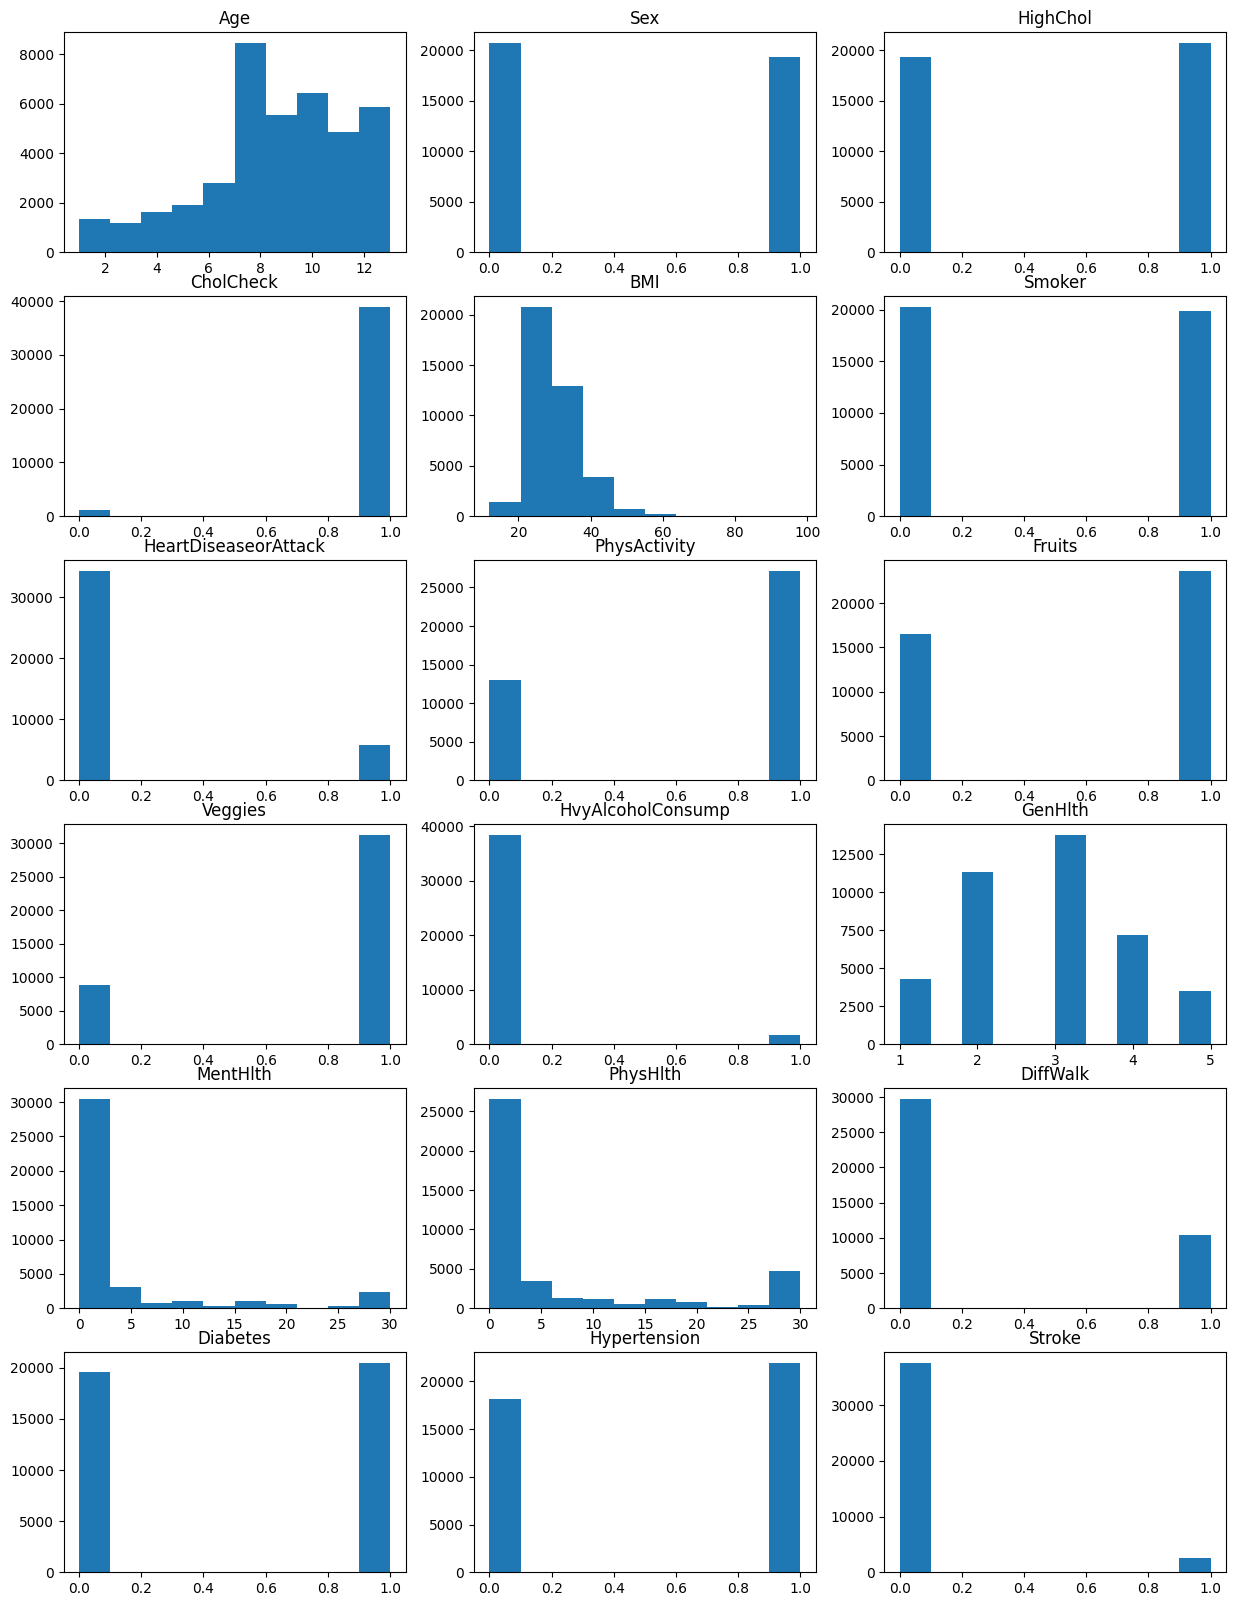

In [ ]:
fig_hist, axs_cat = plt.subplots(6, 3, figsize=(15, 20))
j=0
i=0
for col in df.columns:
  axs_cat[i,j].hist(df[col])
  axs_cat[i,j].set_title(col)
  if j == 2:
    i+=1
  j=(j+1)%3

## Data Preprocessing

Remove the target variables (Diabetes, Hypertension and Stroke) from the dataframe:

In [ ]:
# Remove the target (last three columns)

# Select the indices
target_index = ['Diabetes', 'Hypertension', 'Stroke']
# Save the target columns
target_columns = df[target_index]
# Drop the columns
df = df.drop(target_index, axis=1)

Identify the categorical and numerical variables, then convert the values of the categorical variables into strings (to be treated as categorical by the gower distance for the distance matrix):

In [ ]:
# names of the numerical variables
numerical_variables = ['BMI', 'MentHlth', 'PhysHlth']

# names of the categorical variables
categorical_variables = df.drop(columns = numerical_variables).columns

# convert to string
df[categorical_variables] = df[categorical_variables].astype(str)

Check the types of the variables (string/numbers):

In [ ]:
df.dtypes

Age                     object
Sex                     object
HighChol                object
CholCheck               object
BMI                      int64
Smoker                  object
HeartDiseaseorAttack    object
PhysActivity            object
Fruits                  object
Veggies                 object
HvyAlcoholConsump       object
GenHlth                 object
MentHlth                 int64
PhysHlth                 int64
DiffWalk                object
dtype: object

**Scaling** of the numerical data:

In [ ]:
def scaling(df):

    # initialize the transformed dataframe
    df_tr = df.copy()

    # Initialize the scaler
    scaler_BMI = MinMaxScaler()
    scaler_mentHealth = MinMaxScaler()
    scaler_phyHealth = MinMaxScaler()

    # Apply the scaler to the numerical data
    df_tr['BMI'] = scaler_BMI.fit_transform(np.array(df_tr['BMI']).reshape(-1,1))
    df_tr['MentHlth'] = scaler_mentHealth.fit_transform(np.array(df_tr['MentHlth']).reshape(-1,1))
    df_tr['PhysHlth'] = scaler_phyHealth.fit_transform(np.array(df_tr['PhysHlth']).reshape(-1,1))

    # return the transformed dataframe
    return df_tr

In [ ]:
df_tr = scaling(df)

## Dimensionality reduction

### FAMD
Factor Analysis of Mixed Data

In [ ]:
# FAMD reduction
famd = prince.FAMD(n_components=15, n_iter=3, random_state = 42, engine="sklearn")
famd = famd.fit(df_tr)

In [ ]:
# variance explainability for every component
famd_trans = famd.eigenvalues_summary
famd_trans

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,14.157,8.90%,8.90%
1,7.971,5.01%,13.92%
2,7.275,4.58%,18.49%
3,6.684,4.20%,22.70%
4,6.343,3.99%,26.69%
5,6.172,3.88%,30.57%
6,6.093,3.83%,34.40%
7,6.067,3.82%,38.22%
8,6.026,3.79%,42.00%


### UMAP
Uniform Manifold Approximation and Projection for Dimension Reduction

In [ ]:
# Function of embedding
def umap_embed(df, n_components=2, intersection=False):

  numerical = df.select_dtypes(exclude='object')

  for c in numerical.columns:
      numerical[c] = (numerical[c] - numerical[c].mean())/numerical[c].std(ddof=0)

  ##preprocessing categorical
  categorical = df.select_dtypes(include='object')
  categorical = pd.get_dummies(categorical)

  #Embedding numerical & categorical
  fit1 = umap.UMAP(random_state=12,
                   n_components=n_components).fit(numerical)

  fit2 = umap.UMAP(metric='dice',
                   n_neighbors=250,
                   n_components=n_components).fit(categorical)


  # intersection will resemble the numerical embedding more.
  if intersection:
    embedding = fit1 * fit2

  # union will resemble the categorical embedding more.
  else:
    embedding = fit1 + fit2

  umap_embedding = embedding.embedding_


  return umap_embedding

In [ ]:
embedding_ =  umap_embed(df_tr, n_components=2, intersection=False)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Plot the data points in the two dimensions found with UMAP:

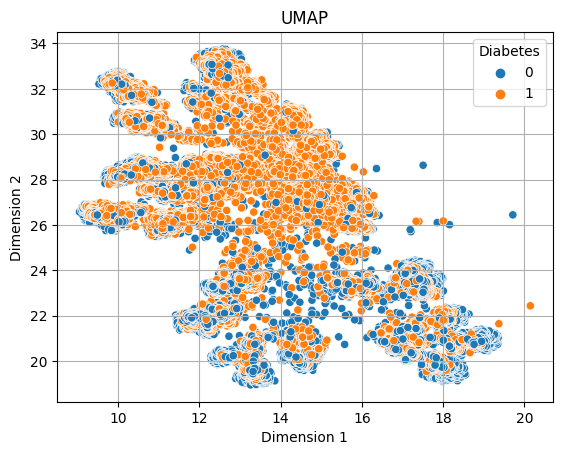

In [ ]:
sns.scatterplot(x=embedding_[:,0], y=embedding_[:,1], hue=(target_columns['Diabetes']))# + target_columns['Hypertension']*2))# + target_columns['Stroke']*4))
plt.xlabel('Dimension 1', fontsize=10)
plt.ylabel('Dimension 2', fontsize=10)
plt.title('UMAP')
plt.grid()
plt.show()

## Distance Matrix

Compute the distance matrix:

In [6]:
if compute_DM:
    DM = gower.gower_matrix(df_tr)
    # change the value type of the matrix from 64 to 16 to lighten the computation:
    DM = np.float16(DM)
    # save the matrix
    np.save('/content/drive/MyDrive/UNSUPERVISED LEARNING /ProgettONE/cose salvate/distance_matrix.npy', DM)
    #np.save('/content/drive/MyDrive/Colab/unsupervised/ProgettONE/cose salvate/distance_matrix.npy', DM)

else:
    # load the already computed distance matrix
    !gdown -q '1aCEpDCH2ZQ4aeCsGw6cN8QPRGNjtcdvM'
    DM = np.load('/content/distance_matrix.npy')

Plot the distance matrix:

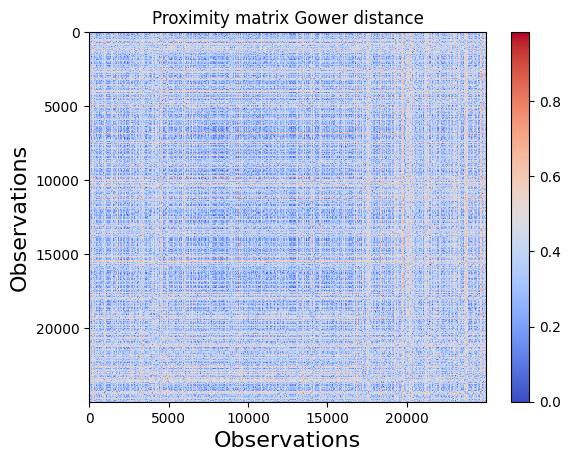

In [7]:
# Plot the proximity matrix
fig_DM = plt.figure()
# only of the first 25000 objects
plt.imshow(DM[:25000, :25000], interpolation='nearest', aspect='auto', cmap='coolwarm')

plt.colorbar()

plt.xlabel('Observations', fontsize=16)
plt.xticks(np.arange(0, 25000, step=5000))
plt.ylabel('Observations', fontsize=16)
plt.yticks(np.arange(0, 25000, step=5000))
plt.title('Proximity matrix Gower distance')

plt.show()

## Anomaly Detection

### 50-Nearest Neighbors

In [ ]:
# k = number of neighbors
k=50
if compute_knn:
  ###################################################################
  ####### THIS CRASHES ON COLAB, IT HAS TO BE RUN LOCALLY ###########
  ###################################################################

  nbrs = knn(n_neighbors=k, metric="precomputed").fit(DM)
  distances, neighbor = nbrs.kneighbors()

else:
  # Load the distances compute locally
  !gdown -q '1CPVWGyEzwFphwl2KOaING1iMFbMsEH8Z'
  distances = np.load('/content/distances_knn.npy')

In [ ]:
# distace of the 50th neighbor (last column)
d_k = distances[:,-1]
# to sort the distances and save the corrisponding indices
indices = np.argsort(d_k)
d_k.sort()

Plot the distances from the k-th nearest neighbor, sorted:

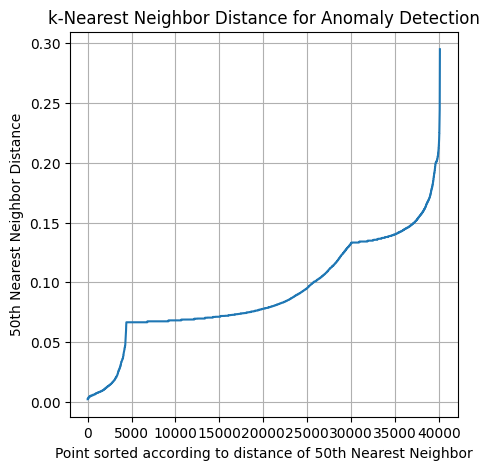

In [ ]:
points = np.arange(0, len(indices), 1)

fig_50nn = plt.figure(figsize=(5,5))

plt.plot(points, d_k)

plt.xlabel("Point sorted according to distance of %dth Nearest Neighbor" %k)
plt.ylabel("%dth Nearest Neighbor Distance" %k)
plt.grid()
plt.title("k-Nearest Neighbor Distance for Anomaly Detection" )
plt.show()

Knee locator:

The estimated inliers pointd are = 38238


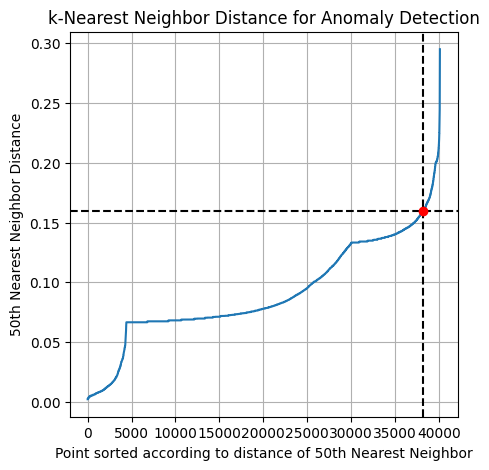

In [ ]:
# choose the y and x of the knee point by hand
y_treshold = 0.16
x_loc = np.where(d_k == d_k[d_k>=y_treshold][0])[0][0]
print('The estimated inliers pointd are = %d' % x_loc)

# Add the knee point to the previous plot
plt.figure(fig_50nn)
# vertical line
plt.axvline(x=x_loc, color='k', linestyle='--')
# horizontal line
plt.axhline(y=y_treshold, color='k', linestyle='--')
# plot
plt.plot((x_loc), (y_treshold), 'o', color='r')

plt.show()

Compute the number of anomalies found with this method:

In [ ]:
print("The number of anomalies detected is: ", len(distances)-x_loc)

The number of anomalies detected is:  1870


### 15-Nearest Neighbors

Retrieve the distances from the 15 nearest neighbors starting from the distances already computed from the 50 nearest neighbors:

In [ ]:
# distace of the 15th neighbor
k = 15
d_k15 = distances[:,14]
indices15 = np.argsort(d_k15)
d_k15.sort()

Plot the sorted distances from the 15-th nearest neighbor:

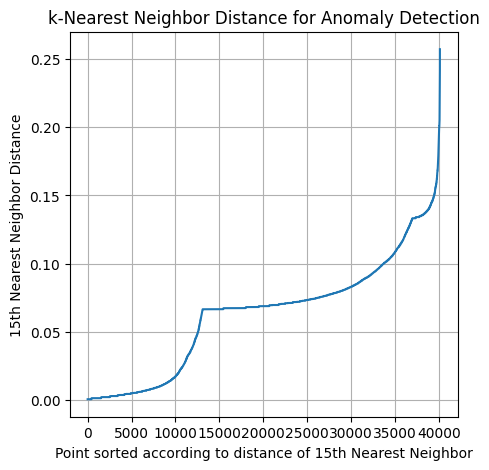

In [ ]:
points = np.arange(0, len(indices15), 1)

fig_15nn = plt.figure(figsize=(5,5))

plt.plot(points, d_k15)

plt.xlabel("Point sorted according to distance of %dth Nearest Neighbor" %k)
plt.ylabel("%dth Nearest Neighbor Distance" %k)
plt.grid()
plt.title("k-Nearest Neighbor Distance for Anomaly Detection" )
plt.show()

Knee Locator:

The estimated inliers pointd are = 38238


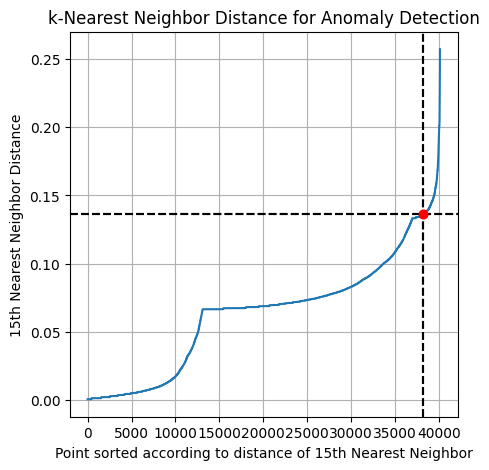

In [ ]:
# choose the knee point by hand, by picking the value that allows to obtain the
# exact same number of outliers found with k = 50
x_loc15 = x_loc
y_treshold15 = d_k15[x_loc]
print('The estimated inliers pointd are = %d' % x_loc15)

# Add the knee point to the previous plot
plt.figure(fig_15nn)
# vertical line
plt.axvline(x=x_loc15, color='k', linestyle='--')
# horizontal line
plt.axhline(y=y_treshold15, color='k', linestyle='--')
# point
plt.plot((x_loc15), (y_treshold15), 'o', color='r')

plt.show()

Check if the anomalies found with 15 and 50 nearest neighbors are the same:

In [ ]:
equal = np.equal(d_k[x_loc:].sort(), d_k15[x_loc:].sort())
if equal:
  print('The points found as oulier considering both the 15th and 50th nearest neighbor are the same.')

The points found as oulier considering both the 15th and 50th nearest neighbor are the same.


### LOF




In [ ]:
if LOF:

  ###################################################################
  ####### THIS CRASHES ON COLAB, IT HAS TO BE RUN LOCALLY ###########
  ###################################################################

  # number of neighbors to consider in N_k(A)
  MinPts = 20

  # proportion of outliers expected in the dataset
  prop = 0.03

  # algorithm = 'auto', 'ball_tree', 'kd_tree', 'brute'
  # contamination = 'auto' or float
  clf = LocalOutlierFactor(n_neighbors= MinPts, algorithm='auto', metric = 'precomputed', contamination = prop)
  clf.fit_predict(DM)
  nlofs = clf.negative_outlier_factor_


else:
  !gdown -q '1qi_yAti49bpADRLrw_Oo8RJtAMJ3c5A8'
  nlofs = np.load('/content/neagtive_lof.npy')

# labels of outliers
outliers_lof = np.where(nlofs < -1.5)[0]

# number of outliers
n_outliers_lof = len(outliers_lof)
print("Number of outliers with LOF:", n_outliers_lof)

Number of outliers with LOF: 10324


### Removal of the anomalies

Remove from the dataframe the anomalies found:

In [ ]:
anomalies = indices[x_loc:]
anomalies.sort()
df_clear = df.drop(anomalies, axis = 0).reset_index(drop=True)
# reapply the scaling
df_tr_clear = scaling(df_clear)

# remove also from the target columns
target_columns_clear = target_columns.drop(anomalies, axis = 0).reset_index(drop=True)

Recompute the Distance Matrix, after removing the anomalies:

In [2]:
if compute_DM_clear:
    DM_c = gower.gower_matrix(df_tr_clear)
    # change the value type of the matrix from 64 to 16 to lighten the computation:
    DM_c16 = np.float16(DM_c)
    DM_c32 = np.float32(DM_c)
    # save the matrix
    np.save('/content/drive/MyDrive/Colab/unsupervised/ProgettONE/cose salvate/DM_clear16.npy', DM_c16)
    np.save('/content/drive/MyDrive/Colab/unsupervised/ProgettONE/cose salvate/DM_clear32.npy', DM_c32)

else:
    # load the already computed distance matrix
    !gdown -q '1-2kB5cV5Ua4kYcEhFjnUS8DlZQjxW5u9'
    DM_c = np.load('/content/DM_clear16.npy')

NameError: ignored

## Clustering algorithms

### Hopkins statistic

Use the Hopkins statistic to measure the natural cluster tendency of the dataset.

Define the function needed to perform the Hopkins statistic:

In [ ]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = knn(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(np.array(X.iloc[rand_X[j]].values).reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

Compute the Hopkins statistic for the original dataset and for the clear (without anomalies) and scaled one:

In [ ]:
H = hopkins(df)
H_clear = hopkins(df_tr_clear)

print("The Hopkins statistic value for the original dataset is %.3f" %H)
print("The Hopkins statistic value for the clear and scaled dataset is %.3f" %H_clear)

The Hopkins statistic value for the original dataset is 0.828
The Hopkins statistic value for the clear and scaled dataset is 0.856


### Hierarchical clustering

**Complete Linkage**

Apply the clustering:

In [ ]:
if hierarchical:

    ###################################################################
    ####### THIS CRASHES ON COLAB, IT HAS TO BE RUN LOCALLY ###########
    ###################################################################

    # reshape the distance matrix as a flatten array
    dist_array = sf(DM_c,force='tovector')

    # apply the algorithm
    Z_complete = linkage(dist_array, method='complete')

else:
    !gdown -q "1t4TciqXo9CUtYPXeRVppU-1kEd-yEMcL"
    Z_complete = np.load("/content/Z_complete.npy")

Plot the dendrogram of the clustering:

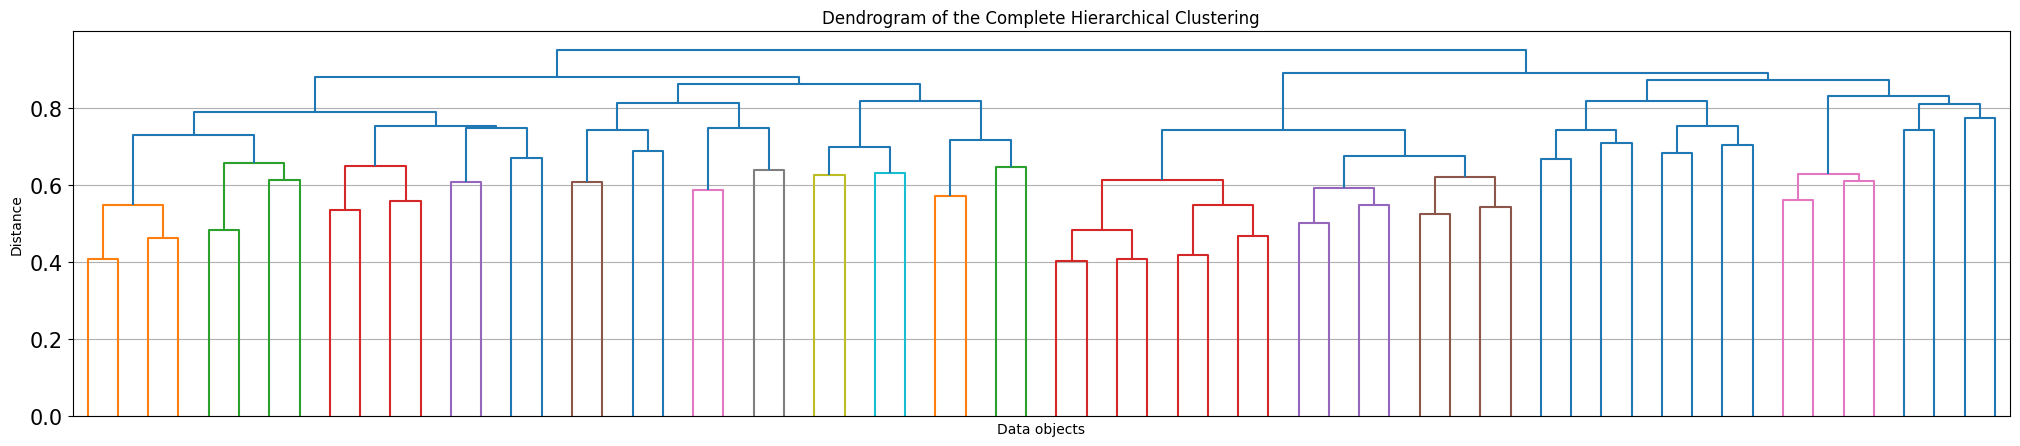

In [ ]:
fig_den_com = plt.figure(figsize=(25, 5))
dn = hierarchy.dendrogram(Z_complete, truncate_mode = 'level',p = 5, show_leaf_counts = True)

plt.tick_params(axis = 'y', which = 'major', labelsize = 15)
plt.tick_params(axis = 'x', which = 'major', labelsize = 8)
plt.xlabel('Data objects')
plt.ylabel('Distance')
plt.xticks([])
#plt.ylim(0,75)
plt.title("Dendrogram of the Complete Hierarchical Clustering")
plt.grid()
plt.show()

Compute the Silhoutte Score to determine the optimal number of clusters:

In [ ]:
# candidate for optimal number of clusters (from 2 to 8 clusters)
k_cand = list(np.arange(2,9,1))
if sil_hierarchical:

  ###################################################################
  ####### THIS CRASHES ON COLAB, IT HAS TO BE RUN LOCALLY ###########
  ###################################################################
  results_complete = dict()
  for k in k_cand:
      cluster_array = fcluster(Z_complete, k, criterion='maxclust')
      score0 = silhouette_score(DM_c, cluster_array, metric='precomputed')
      results_complete[k] = {'k':cluster_array,'s0':score0}
else:
  !gdown -q "1kPXU7S-QhKHj3PdtsihBSKnL6uYhgylv"
  scores_complete = np.load("/content/silhoutte_score_complete.npy", allow_pickle=True)
  scores_complete = dict(enumerate(scores_complete.flatten(), 1))[1]

Plot the Silhoutte score vs the number of clusters:

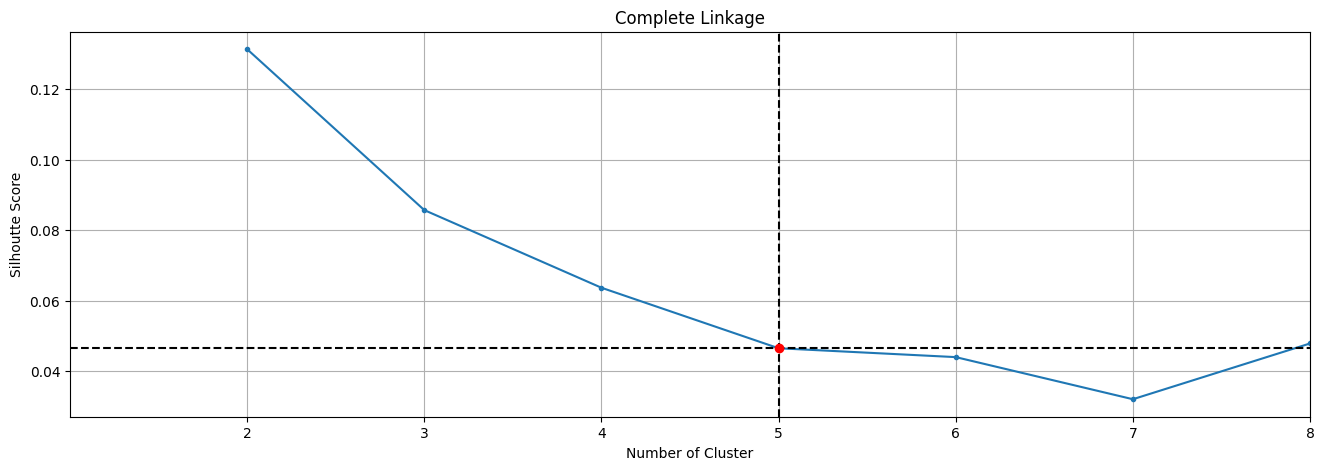

In [ ]:
fig_sil_comp = plt.figure(figsize=(16,5))
plt.plot([i for i in scores_complete.keys()],[i['s0'] for i in scores_complete.values()],'.-')

# find the knee point
knee = KneeLocator([i for i in scores_complete.keys()],[i['s0'] for i in scores_complete.values()], S=1, curve='convex', direction='decreasing')#, interp_method='polynomial')
# plot the the knee point for the best solution
x_complete = knee.knee      # x coordinate of the knee point
y_complete = knee.knee_y      # y coordinate of the knee point

# vertical line
plt.axvline(x=x_complete, color='k', linestyle='--')
# horizontal line
plt.axhline(y=y_complete, color='k', linestyle='--')
# add the point
plt.plot((x_complete), (y_complete), 'o', color='r')

plt.xlim(1,8)
plt.xticks(k_cand)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoutte Score')
plt.title('Complete Linkage')

plt.grid()

**Single Linkage**

Apply the clustering:

In [ ]:
if hierarchical:

    ###################################################################
    ####### THIS CRASHES ON COLAB, IT HAS TO BE RUN LOCALLY ###########
    ###################################################################

    # reshape the distance matrix as a flatten array
    dist_array = sf(DM_c,force='tovector')

    # apply the algorithm
    Z_single = linkage(dist_array, method='single')

else:
    !gdown -q "1kzTJrtc2y2KOuP9yIoK_sb8b2HmjM6r7"
    Z_single = np.load("/content/Z_single.npy")

Plot the dendrogram of the clustering:

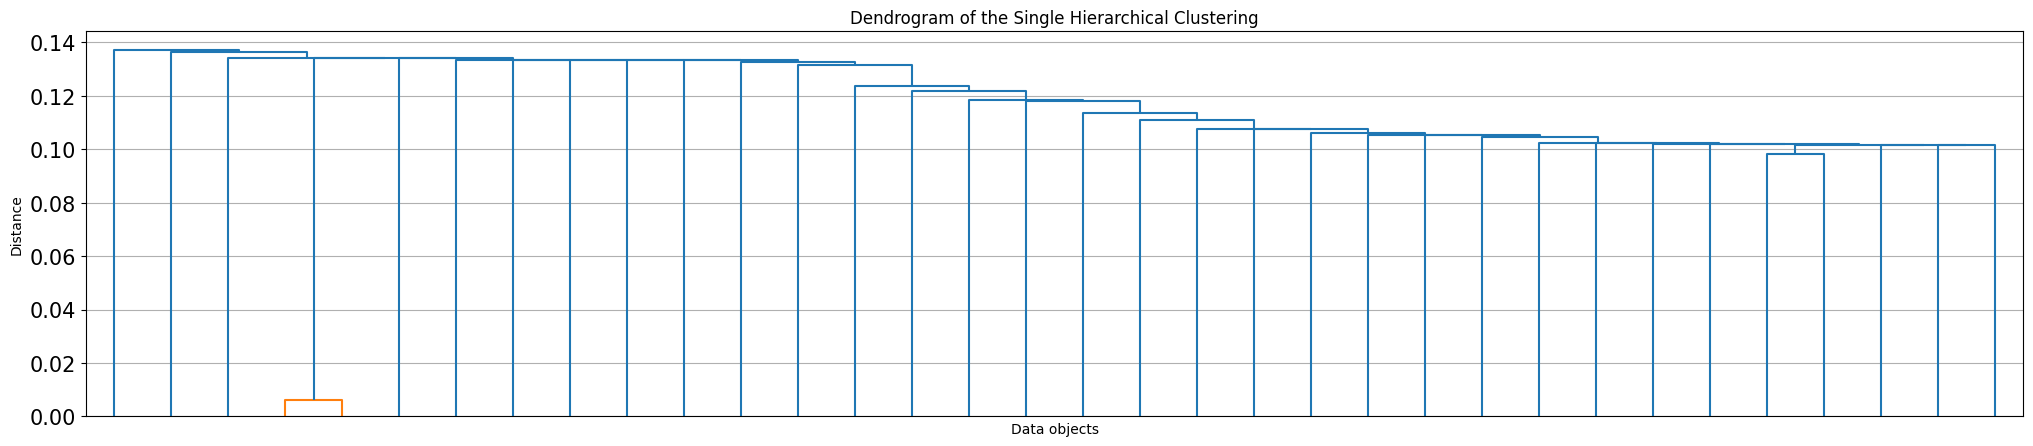

In [ ]:
fig_den_sing = plt.figure(figsize=(25, 5))
dn = hierarchy.dendrogram(Z_single, truncate_mode = 'level',p = 30, show_leaf_counts = True)

plt.tick_params(axis = 'y', which = 'major', labelsize = 15)
plt.tick_params(axis = 'x', which = 'major', labelsize = 8)
plt.xlabel('Data objects')
plt.ylabel('Distance')
plt.xticks([])

plt.title("Dendrogram of the Single Hierarchical Clustering")
plt.grid()
plt.show()

Compute the Silhoutte Score to determine the optimal number of clusters:

In [ ]:
k_cand = list(np.arange(2,9,1))
if sil_hierarchical:

  ###################################################################
  ####### THIS CRASHES ON COLAB, IT HAS TO BE RUN LOCALLY ###########
  ###################################################################
  results_single = dict()
  k_cand = list(np.arange(2,9,1))
  for k in k_cand:
      cluster_array = fcluster(Z_single, k, criterion='maxclust')
      score0 = silhouette_score(DM_c, cluster_array, metric='precomputed')
      results_single[k] = {'k':cluster_array,'s0':score0}
else:
  !gdown -q "1a7IiISz0KoUphYA9Kw_ZtScfDag_WwB-"
  scores_single = np.load("/content/silhoutte_score_single.npy", allow_pickle=True)
  scores_single = dict(enumerate(scores_single.flatten(), 1))[1]

Plot the Silhoutte score vs the number of clusters:

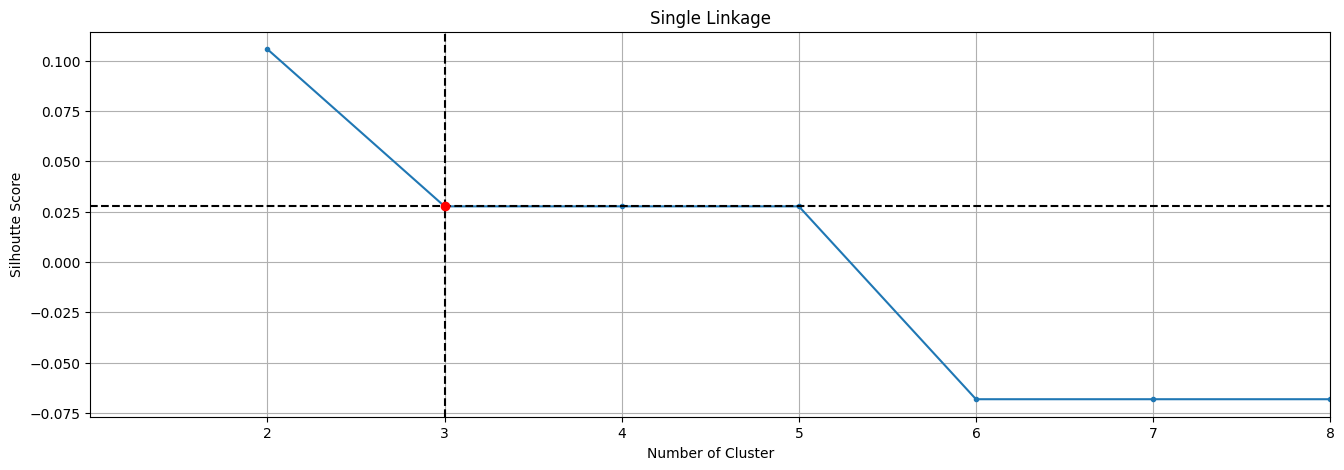

In [ ]:
fig_sil_sing = plt.figure(figsize=(16,5))
plt.plot([i for i in scores_single.keys()],[i['s0'] for i in scores_single.values()],'.-')

# find the knee point
knee = KneeLocator([i for i in scores_single.keys()],[i['s0'] for i in scores_single.values()], S=1, curve='convex', direction='decreasing')#, interp_method='polynomial')
# plot the the knee point for the best solution
x_single = knee.knee      # x coordinate of the knee point
y_single = knee.knee_y      # y coordinate of the knee point

# vertical line
plt.axvline(x=x_single, color='k', linestyle='--')
# horizontal line
plt.axhline(y=y_single, color='k', linestyle='--')
# plot the the knee point for the best solution
plt.plot((x_single), (y_single), 'o', color='r')

plt.xlim(1,8)
plt.xticks(k_cand)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoutte Score')
plt.title('Single Linkage')

plt.grid()

**Ward's Method**

Apply the clustering:

In [ ]:
if hierarchical:

    ###################################################################
    ####### THIS CRASHES ON COLAB, IT HAS TO BE RUN LOCALLY ###########
    ###################################################################

    # reshape the distance matrix as a flatten array
    dist_array = sf(DM_c,force='tovector')

    # apply the algorithm
    Z_ward = linkage(dist_array, method='ward')

else:
    !gdown -q "14Aob6uxaO_PwDvkAT_PUZSavpQwtjSU1"
    Z_ward = np.load("/content/Z_ward.npy")

Plot the dendrogram of the clustering:

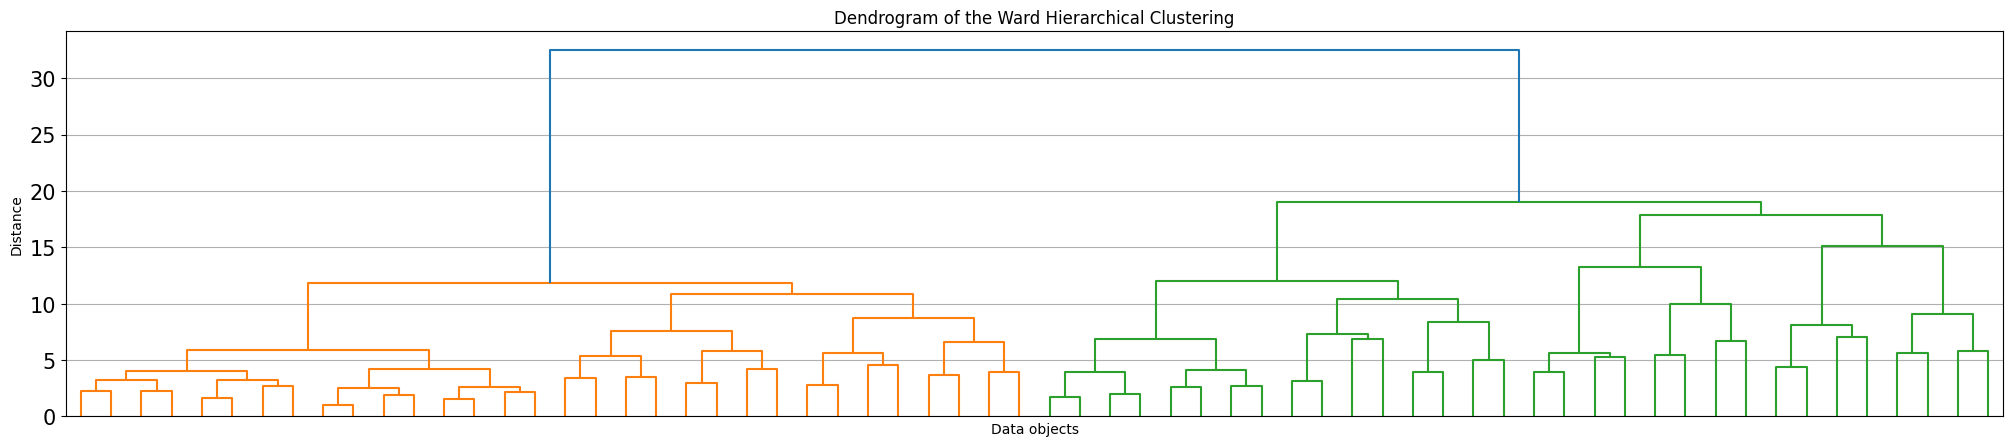

In [ ]:
fig_den_ward = plt.figure(figsize=(25, 5))
dn = hierarchy.dendrogram(Z_ward, truncate_mode = 'level',p = 5, show_leaf_counts = True)

plt.tick_params(axis = 'y', which = 'major', labelsize = 15)
plt.tick_params(axis = 'x', which = 'major', labelsize = 8)
plt.xlabel('Data objects')
plt.ylabel('Distance')
plt.xticks([])
#plt.ylim(0,75)
plt.title("Dendrogram of the Ward Hierarchical Clustering")
plt.grid()
plt.show()

Compute the Silhoutte Score to determine the optimal number of cluster:

In [ ]:
k_cand = list(np.arange(2,9,1))
if sil_hierarchical:

  ###################################################################
  ####### THIS CRASHES ON COLAB, IT HAS TO BE RUN LOCALLY ###########
  ###################################################################
  results_ward = dict()
  k_cand = list(np.arange(2,9,1))
  for k in k_cand:
      cluster_array = fcluster(Z_ward, k, criterion='maxclust')
      score0 = silhouette_score(DM_c, cluster_array, metric='precomputed')
      results_ward[k] = {'k':cluster_array,'s0':score0}
else:
  !gdown -q "10F5R25-BiocpL6fchdom1LJ-_wgBpukx"
  scores_ward = np.load("/content/silhoutte_score_ward.npy", allow_pickle=True)
  scores_ward = dict(enumerate(scores_ward.flatten(), 1))[1]

Plot the Silhoutte score vs the number of clusters:

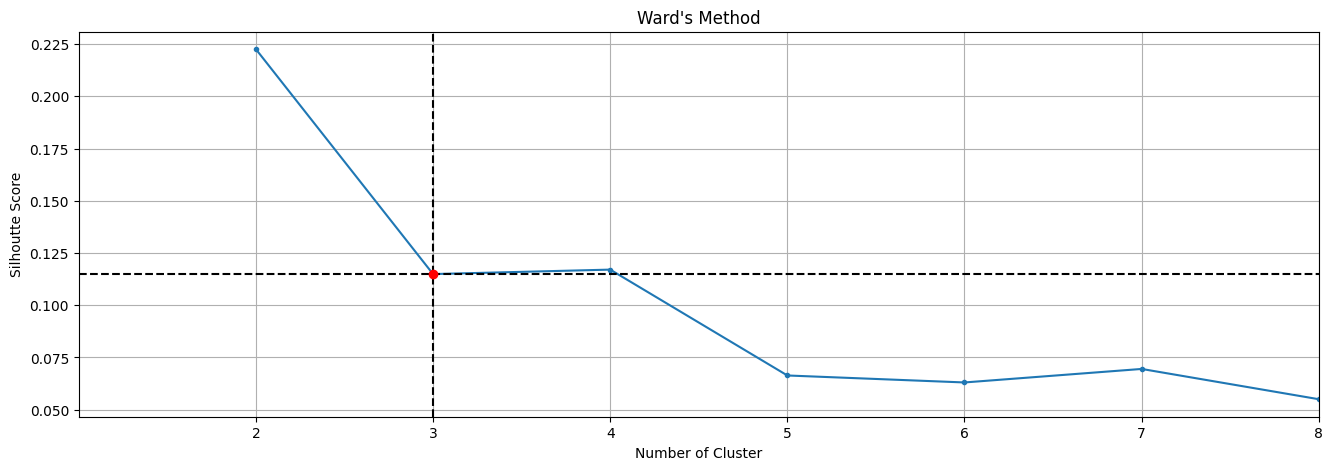

In [ ]:
fig_sil_ward = plt.figure(figsize=(16,5))
plt.plot([i for i in scores_ward.keys()],[i['s0'] for i in scores_ward.values()],'.-')

# find the knee point
knee = KneeLocator([i for i in scores_ward.keys()],[i['s0'] for i in scores_ward.values()], S=1, curve='convex', direction='decreasing')#, interp_method='polynomial')
# plot the the knee point for the best solution
x_ward = knee.knee      # x coordinate of the knee point
y_ward = knee.knee_y      # y coordinate of the knee point

# vertical line
plt.axvline(x=x_ward, color='k', linestyle='--')
# horizontal line
plt.axhline(y=y_ward, color='k', linestyle='--')
# plot the the knee point for the best solution
plt.plot((x_ward), (y_ward), 'o', color='r')

plt.xlim(1,8)
plt.xticks(list(np.arange(2,9,1)))
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoutte Score')
plt.title("Ward's Method")

plt.grid()

**Comparison** of the performance of the different linkage methods:

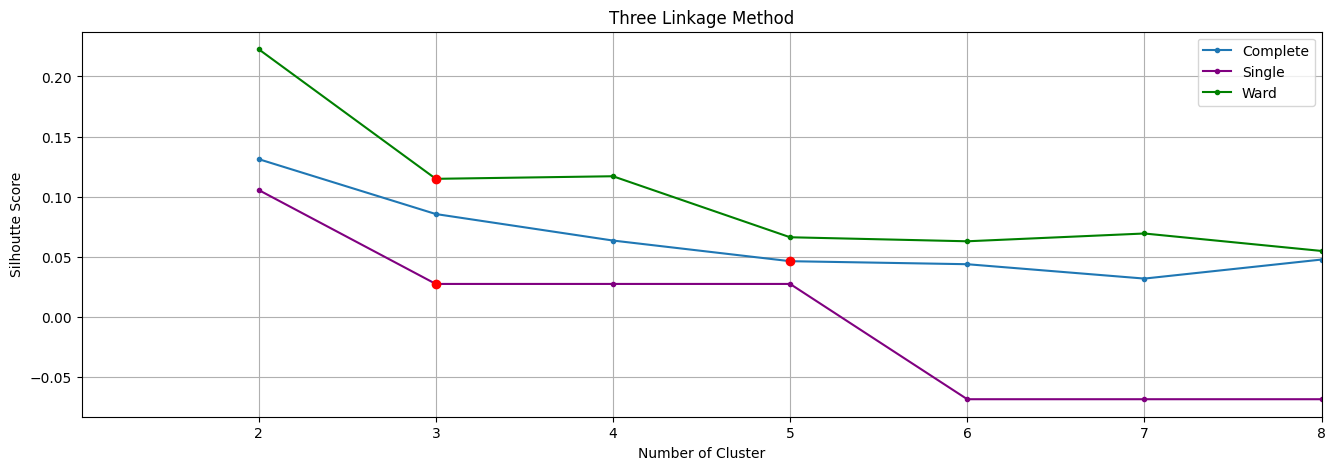

In [ ]:
fig_sil_tot = plt.figure(figsize=(16,5))
plt.plot([i for i in scores_complete.keys()],[i['s0'] for i in scores_complete.values()],'.-',label='Complete')
plt.plot([i for i in scores_single.keys()],[i['s0'] for i in scores_single.values()], '.-', color = 'purple', label='Single')
plt.plot([i for i in scores_ward.keys()],[i['s0'] for i in scores_ward.values()], '.-', color = 'green', label='Ward')

# Knee point complete
plt.plot((x_complete), (y_complete), 'o', color='r')

# Knee point single
plt.plot((x_single), (y_single), 'o', color='r')

# Knee point ward
plt.plot((x_ward), (y_ward), 'o', color='r')

plt.xlim(1,8)
plt.xticks(k_cand)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhoutte Score')
plt.title('Three Linkage Method')
plt.grid()
plt.legend()

plt.show()

Apply the best solution found, with the optimal number of clusters:

In [ ]:
# Choose the optimal number of clusters, from the dendogram
x_ward = 3

hierarchical_labels = fcluster(Z_ward, x_ward, criterion='maxclust') - 1

print('The element in the first cluster is: ', len(hierarchical_labels[hierarchical_labels==0]))
print('The element in the second cluster is: ', len(hierarchical_labels[hierarchical_labels==1]))
print('The element in the third cluster is: ', len(hierarchical_labels[hierarchical_labels==2]))

The element in the first cluster is:  8834
The element in the second cluster is:  11724
The element in the third cluster is:  17680


### DBSCAN

Parameters to run DBSCAN clustering (we choose EPS = 0,1 by looking at the k-Nearest Neighbor plot and considering the knee-point after removing the outliers):

In [ ]:
# maximum distance between two samples for one to be considered as in the neighborhood of the other
EPS             = 0.1
# number of samples in a neighborhood for a point to be considered as a core point.
MINSAMPLES      = 100

Apply the algorithm:

In [ ]:
if dbscan:
    ###################################################################
    ####### THIS CRASHES ON COLAB, IT HAS TO BE RUN LOCALLY ###########
    ###################################################################

    db = DBSCAN(eps = EPS, min_samples = MINSAMPLES, metric = "precomputed").fit(DM_c)

# we do not import the whole computed clustering because it is too heavy and time demanding to be uploaded on google drive

Retrieve the labels of the data objects, found with DBSCAN clustering:

In [ ]:
if dbscan:
    db_labels = db.labels_
else:
    # already computed locally
    !gdown -q '1OHnDTINmbl65otCbRH9L_qZ2-jlXprbD'
    db_labels = np.load('/content/db_label.npy')

Number of clusters and of core, noise, and border points found with DBSCAN clustering:

In [ ]:
# number of different (unique) labels found by the algorithm
unique_labels = np.unique(db_labels)
# the number of clusters is the number of unique labels, minus one (noise points have their own unique label)
Kd = len(unique_labels) - 1                 # number of clusters

# retrieve the indices of the core points found by DBSCAN
if dbscan:
    core_indices = db.core_sample_indices_
else:
    # already computed locally
    !gdown -q '1zzjfv1dssWYKPPqrOqABw4wEg1oPq5LY'
    core_indices = np.load('/content/db_core.npy')

# core points
corep = np.size(core_indices)
# noise points (label -1)
noisep = list(db_labels).count(-1)
# border points
bordp = df_tr_clear.shape[0] - corep - noisep

print("Estimated number of clusters: %d" % Kd)
print("In total, there should be %d core points and %d border points." % (corep, bordp))
print("Estimated number of noise points: %d." % noisep)

Estimated number of clusters: 1
In total, there should be 18574 core points and 10090 border points.
Estimated number of noise points: 9574.


### K-Prototypes

Perform the k-Prototypes clustering 8 times, in order to find the optimal number of clusters with the elbow method:

In [ ]:
#Choosing optimal K value

# get the indices of the columns with the categorical variables
cols_index = [df_tr_clear.columns.get_loc(col) for col in categorical_variables]

if kproto:
    # For the K-prototypes function, cost is defined as the sum distance of all points to their respective cluster centroids.
    # list of the costs for each number of clusters K
    cost = []
    for num_clusters in range(1, 9):
        #Selecting ‘Huang’ as the init, the model will select the first k distinct objects from the data
        # set as initial k-modes and then assign the most frequent categories equally to the initial k-modes.
        kproto = KPrototypes(n_clusters = num_clusters, init = 'Huang', random_state = 42,
                              n_jobs = -2, max_iter = 20, n_init = 50)
        kproto.fit_predict(df_tr_clear, categorical = cols_index)
        # add the cost of the current K to the list
        cost.append(kproto.cost_)
        print("Cost with %d clusters: %.10f" %(num_clusters, kproto.cost_))
else:
    # already computed
    cost = [24106.0258073200, 19552.4390079153, 16706.5284761527, 15734.0091690219, 15042.7241610641, 14468.3549745421, 14044.0975020297, 13534.7605045358]

Plot the trend of the cost of the clustering with the number of clusters:

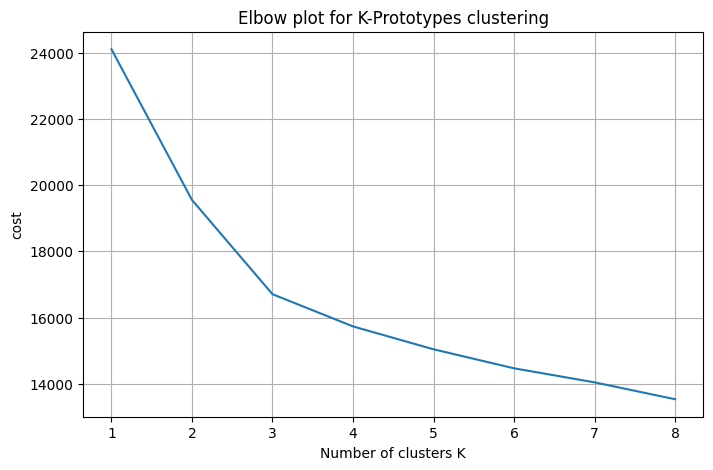

In [ ]:
fig_cost_tot = plt.figure(figsize=(8, 5))
plt.plot(range(1, 9), cost)
plt.xlabel('Number of clusters K')
plt.ylabel('cost')
plt.grid()
plt.title('Elbow plot for K-Prototypes clustering')
plt.show()

Find the knee point:

In [ ]:
knee = KneeLocator(range(1, 9), cost, S=1, curve='convex', direction='decreasing')#, interp_method='polynomial')

knee_x = knee.knee      # x coordinate of the knee point
knee_y = knee.knee_y      # y coordinate of the knee point

print('The estimated best number of clusters is = %d' % knee_x)

The estimated best number of clusters is = 3


Add the knee point in the previous plot:

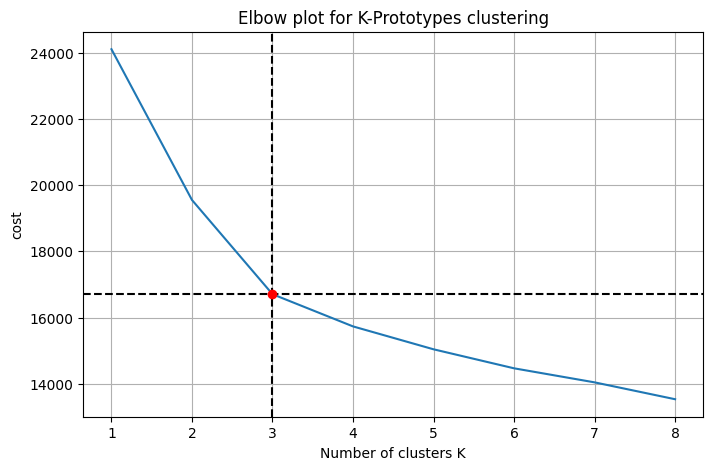

In [ ]:
plt.figure(fig_cost_tot)

# vertical line
plt.axvline(x=knee_x, color='k', linestyle='--')
# horizontal line
plt.axhline(y=knee_y, color='k', linestyle='--')
# point
plt.plot((knee_x), (knee_y), 'o', color='r')

plt.show()

Perform the k-prototypes clustering with the optimal number of clusters (3):

In [ ]:
if kproto_optimal:
    # optimal number of clusters for the k-prototypes algorithm
    K_k = knee_x
    # perform the clustering
    kproto3 = KPrototypes(n_clusters = K_k, init = 'Huang', random_state = 42,
                            n_jobs = -2, max_iter = 20, n_init = 50)
    kproto3.fit_predict(df_tr_clear, categorical = cols_index)

    # save the labels
    np.save('/content/drive/MyDrive/UNSUPERVISED LEARNING /ProgettONE/cose salvate/kproto3_labels.npy', kproto3.labels_)
    kproto3_labels = kproto3.labels_
else:
    # load the already computed labels
    !gdown -q '1T-_6ozGreCLJ-7CFsHTEZ7t5iqgBVSpg'
    kproto3_labels = np.load('/content/kproto3_labels.npy')

Population of each cluster:

In [ ]:
print('The number of elements in the first cluster is: ', len(kproto3_labels[kproto3_labels==0]))
print('The number of elements in the second cluster is: ', len(kproto3_labels[kproto3_labels==1]))
print('The number of elements in the third cluster is: ', len(kproto3_labels[kproto3_labels==2]))

The number of elements in the first cluster is:  5960
The number of elements in the second cluster is:  14087
The number of elements in the third cluster is:  18191


## Evaluation

### Unsupervised performance measures

**Silhouette** coefficient:

Hierachical (Ward's Method) with 3 clusters:

In [ ]:
print('The Silhoutte Score of the clustering solution obtained with the Hierarchial method is: %.3f' %scores_ward[3]['s0'])

The Silhoutte Score of the clustering solution obtained with the Hierarchial method is: 0.115


k-Prototypes with 3 clusters:



In [ ]:
if sil_kproto:

  ###################################################################
  ####### THIS CRASHES ON COLAB, IT HAS TO BE RUN LOCALLY ###########
  ###################################################################
  silhoutte_kproto3 = silhouette_score(DM_c, kproto3_labels, metric='precomputed')
else:
  # Already computed
  silhoutte_kproto3 = 0.14079589694860387

In [ ]:
print('The Silhoutte Score of the clustering solution obtained with the k-Prototypes method is: %.3f' %silhoutte_kproto3)

The Silhoutte Score of the clustering solution obtained with the k-Prototypes method is: 0.141


 **Dunn** Index:

In [ ]:
# Dunn = min(distance inter-clustering)/max(distance intra-clustering)

# Definition of the functions

def inter_cluster_distances(labels, distances, method='nearest'):
    """Calculates the distances between the two nearest points of each cluster.
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: `nearest` for the distances between the two nearest points in each cluster, or `farthest`
    """

    if method == 'nearest':
        return __cluster_distances_by_points(labels, distances)
    elif method == 'farthest':
        return __cluster_distances_by_points(labels, distances, farthest=True)


def __cluster_distances_by_points(labels, distances, farthest=False):
    n_unique_labels = len(np.unique(labels))
    cluster_distances = np.full((n_unique_labels, n_unique_labels),
                                float('inf') if not farthest else 0)

    np.fill_diagonal(cluster_distances, 0)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i, len(labels)):
            if labels[i] != labels[ii] and (
                (not farthest and
                 distances[i, ii] < cluster_distances[labels[i], labels[ii]])
                    or
                (farthest and
                 distances[i, ii] > cluster_distances[labels[i], labels[ii]])):
                cluster_distances[labels[i], labels[ii]] = cluster_distances[
                    labels[ii], labels[i]] = distances[i, ii]
    return cluster_distances


def diameter(labels, distances, method='farthest'):
    """Calculates cluster diameters
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: either `mean_cluster` for the mean distance between all elements in each cluster, or `farthest` for the distance between the two points furthest from each other
    """

    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    if method == 'mean_cluster':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii]:
                    diameters[labels[i]] += distances[i, ii]

        for i in range(len(diameters)):
            diameters[i] /= sum(labels == i)

    elif method == 'farthest':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii] and distances[i, ii] > diameters[
                        labels[i]]:
                    diameters[labels[i]] = distances[i, ii]
    return diameters


def dunn(labels, distances, diameter_method='farthest',
         cdist_method='nearest'):
    """
    Dunn index for cluster validation (larger is better).

    .. math:: D = \\min_{i = 1 \\ldots n_c; j = i + 1\ldots n_c} \\left\\lbrace \\frac{d \\left( c_i,c_j \\right)}{\\max_{k = 1 \\ldots n_c} \\left(diam \\left(c_k \\right) \\right)} \\right\\rbrace

    where :math:`d(c_i,c_j)` represents the distance between
    clusters :math:`c_i` and :math:`c_j`, and :math:`diam(c_k)` is the diameter of cluster :math:`c_k`.
    Inter-cluster distance can be defined in many ways, such as the distance between cluster centroids or between their closest elements. Cluster diameter can be defined as the mean distance between all elements in the cluster, between all elements to the cluster centroid, or as the distance between the two furthest elements.
    The higher the value of the resulting Dunn index, the better the clustering
    result is considered, since higher values indicate that clusters are
    compact (small :math:`diam(c_k)`) and far apart (large :math:`d \\left( c_i,c_j \\right)`).
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param diameter_method: see :py:function:`diameter` `method` parameter
    :param cdist_method: see :py:function:`diameter` `method` parameter

    .. [Kovacs2005] Kovács, F., Legány, C., & Babos, A. (2005). Cluster validity measurement techniques. 6th International Symposium of Hungarian Researchers on Computational Intelligence.
    """


    ic_distances = inter_cluster_distances(labels, distances, cdist_method)
    min_distance = min(ic_distances[ic_distances.nonzero()])
    max_diameter = max(diameter(labels, distances, diameter_method))

    return min_distance / max_diameter

Hierachical (Ward's Method) with 3 clusters:

In [ ]:
# The computetion takes some time
# Precompute value is 0.026206872565386757
dunn_hierachical = dunn(hierarchical_labels, DM_c, 'farthest', 'nearest')

print('The Dunn Score of the clustering solution obtained with the Hierarchial method is: %.4f' %dunn_hierachical)

The Dunn Score of the clustering solution obtained with the Hierarchial method is: 0.0262


k-Prototypes with 3 clusters:

In [ ]:
# The computation takes some time
# Precompute value is 0.0008971133474576271
dunn_kproto = dunn(kproto3_labels, DM_c, 'farthest', 'nearest')

print('The Dunn Score of the clustering solution obtained with the k-Prototypes method is: %.4f' %dunn_kproto)

The Dunn Score of the clustering solution obtained with the k-Prototypes method is: 0.0009


### Supervised performance measures

**Rand score**

In [ ]:
# Value fo the rand index for the three different target variable
# DIABETES 2 cluster
# HIERARCHICAL CLUSTERING
rand_h = rand_score(target_columns_clear['Diabetes'], hierarchical_labels)
print("The Rand Score for the hierarchical clustering predicting Diabetes is: %.3f" %rand_h)
# K-PROTOTYPES CLUSTERING
rand_k = rand_score(target_columns_clear['Diabetes'], kproto3_labels)
print("The Rand Score for the k-Prototypes clustering predicting Diabetes is: %.3f\n" %rand_k)


# HYPERTENSION 2 cluster
# HIERARCHICAL CLUSTERING
rand_h = rand_score(target_columns_clear['Hypertension'], hierarchical_labels)
print("The Rand Score for the hierarchical clustering predicting Hypertension is: %.3f" %rand_h)
# K-PROTOTYPES CLUSTERING
rand_k = rand_score(target_columns_clear['Hypertension'], kproto3_labels)
print("The Rand Score for the k-Prototypes clustering predicting Hypertension is: %.3f\n" %rand_k)

# STROKE 2 cluster
# HIERARCHICAL CLUSTERING
rand_h = rand_score(target_columns_clear['Stroke'], hierarchical_labels)
print("The Rand Score for the hierarchical clustering predicting Stroke is: %.3f" %rand_h)
# K-PROTOTYPES CLUSTERING
rand_k = rand_score(target_columns_clear['Stroke'], kproto3_labels)
print("The Rand Score for the k-Prototypes clustering predicting Stroke is: %.3f\n" %rand_k)

The Rand Score for the hierarchical clustering predicting Diabetes is: 0.522
The Rand Score for the k-Prototypes clustering predicting Diabetes is: 0.523

The Rand Score for the hierarchical clustering predicting Hypertension is: 0.501
The Rand Score for the k-Prototypes clustering predicting Hypertension is: 0.499

The Rand Score for the hierarchical clustering predicting Stroke is: 0.395
The Rand Score for the k-Prototypes clustering predicting Stroke is: 0.417



In [ ]:
# Value fo the rand index for all combination of Diabetes and Hypertension
# 4 cluster
# 0: Diabetes = 0, Hypertension = 0
# 1: Diabetes = 1, Hypertension = 0
# 2: Diabetes = 0, Hypertension = 1
# 3: Diabetes = 1, Hypertension = 1
# HIERARCHICAL CLUSTERING
rand_h = rand_score(target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2, hierarchical_labels)
print("The Rand Score for the hierarchical clustering predicting all combination of Diabetes and Hypertension is: %.3f" %rand_h)
# K-PROTOTYPES CLUSTERING
rand_k = rand_score(target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2, kproto3_labels)
print("The Rand Score for the k-Prototypes clustering predicting all combination of Diabetes and Hypertension is: %.3f\n" %rand_k)

The Rand Score for the hierarchical clustering predicting all combination of Diabetes and Hypertension is: 0.571
The Rand Score for the k-Prototypes clustering predicting all combination of Diabetes and Hypertension is: 0.559



In [ ]:
# Value fo the rand index for combination of Diabetes and Hypertension, always 3 cluster
# Cluster:
# Diabetes = 1, Hypertension = _
# Diabetes = 0, Hypertension = 0
# Diabetes = 0, Hypertension = 1
target = target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2
target = np.where(target == 3, 1, target)
# HIERARCHICAL CLUSTERING
rand_h = rand_score(target, hierarchical_labels)
print("The Rand Score for the hierarchical clustering predicting the clusters (D=0, H=0), (D=0, H=1), (D=1, H=0, H=1) is: %.3f" %rand_h)
# K-PROTOTYPES CLUSTERING
rand_k = rand_score(target, kproto3_labels)
print("The Rand Score for the k-Prototypes clustering predicting the clusters (D=0, H=0), (D=0, H=1), (D=1, H=0, H=1) is: %.3f \n" %rand_k )

# Cluster:
# Diabetes = 0, Hypertension = _
# Diabetes = 1, Hypertension = 0
# Diabetes = 1, Hypertension = 1
target = target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2
target = np.where(target == 2, 0, target)
# HIERARCHICAL CLUSTERING
rand_h = rand_score(target, hierarchical_labels)
print("The Rand Score for the hierarchical clustering predicting the clusters (D=1, H=0), (D=1, H=1), (D=0, H=0, H=1) is: %.3f" %rand_h)
# K-PROTOTYPES CLUSTERING
rand_k = rand_score(target, kproto3_labels)
print("The Rand Score for the k-Prototypes clustering predicting the clusters (D=1, H=0), (D=1, H=1), (D=0, H=0, H=1) is: %.3f\n" %rand_k)

# Cluster:
# Diabetes = _, Hypertension = 1
# Diabetes = 1, Hypertension = 0
# Diabetes = 0, Hypertension = 0
target = target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2
target = np.where(target == 3, 2, target)
# HIERARCHICAL CLUSTERING
rand_h = rand_score(target, hierarchical_labels)
print("The Rand Score for the hierarchical clustering predicting the clusters (D=1, H=0), (D=0, H=0), (D=0, D=1, H=1) is: %.3f" %rand_h)
# K-PROTOTYPES CLUSTERING
rand_k = rand_score(target, kproto3_labels)
print("The Rand Score for the k-Prototypes clustering predicting the clusters (D=1, H=0), (D=0, H=0), (D=0, D=1, H=1) is: %.3f\n" %rand_k)

# Cluster:
# Diabetes = _, Hypertension = 0
# Diabetes = 1, Hypertension = 1
# Diabetes = 0, Hypertension = 1
target = target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2
target = np.where(target == 1, 0, target)
# HIERARCHICAL CLUSTERING
rand_h = rand_score(target, hierarchical_labels)
print("The Rand Score for the hierarchical clustering predicting the clusters (D=1, H=1), (D=0, H=1), (D=0, D=1, H=0) is: %.3f" %rand_h)
# K-PROTOTYPES CLUSTERING
rand_k = rand_score(target, kproto3_labels)
print("The Rand Score for the k-Prototypes clustering predicting the clusters (D=1, H=1), (D=0, H=1), (D=0, D=1, H=0) is: %.3f\n" %rand_k)

The Rand Score for the hierarchical clustering predicting the clusters (D=0, H=0), (D=0, H=1), (D=1, H=0, H=1) is: 0.545
The Rand Score for the k-Prototypes clustering predicting the clusters (D=0, H=0), (D=0, H=1), (D=1, H=0, H=1) is: 0.531 

The Rand Score for the hierarchical clustering predicting the clusters (D=1, H=0), (D=1, H=1), (D=0, H=0, H=1) is: 0.547
The Rand Score for the k-Prototypes clustering predicting the clusters (D=1, H=0), (D=1, H=1), (D=0, H=0, H=1) is: 0.552

The Rand Score for the hierarchical clustering predicting the clusters (D=1, H=0), (D=0, H=0), (D=0, D=1, H=1) is: 0.528
The Rand Score for the k-Prototypes clustering predicting the clusters (D=1, H=0), (D=0, H=0), (D=0, D=1, H=1) is: 0.523

The Rand Score for the hierarchical clustering predicting the clusters (D=1, H=1), (D=0, H=1), (D=0, D=1, H=0) is: 0.544
The Rand Score for the k-Prototypes clustering predicting the clusters (D=1, H=1), (D=0, H=1), (D=0, D=1, H=0) is: 0.536



**Adjusted Rand Score**

In [ ]:
# Value fo the rand index for the three different target variable
# DIABETES 2 cluster
# HIERARCHICAL CLUSTERING
arand_h = adjusted_rand_score(target_columns_clear['Diabetes'], hierarchical_labels)
print("The Adjusted Rand Score for the hierarchical clustering predicting Diabetes is: %.3f" %arand_h)
# K-PROTOTYPES CLUSTERING
arand_k = adjusted_rand_score(target_columns_clear['Diabetes'], kproto3_labels)
print("The Adjusted Rand Score for the k-Prototypes clustering predicting Diabetes is: %.3f\n" %arand_k)


# HYPERTENSION 2 cluster
# HIERARCHICAL CLUSTERING
arand_h = adjusted_rand_score(target_columns_clear['Hypertension'], hierarchical_labels)
print("The Adjusted Rand Score for the hierarchical clustering predicting Hypertension is: %.3f" %arand_h)
# K-PROTOTYPES CLUSTERING
arand_k = adjusted_rand_score(target_columns_clear['Hypertension'], kproto3_labels)
print("The Adjusted Rand Score for the k-Prototypes clustering predicting Hypertension is: %.3f\n" %arand_k)

# Stroke 2 cluster
# HIERARCHICAL CLUSTERING
arand_h = adjusted_rand_score(target_columns_clear['Stroke'], hierarchical_labels)
print("The Adjusted Rand Score for the hierarchical clustering predicting Stroke is: %.3f" %arand_h)
# K-PROTOTYPES CLUSTERING
arand_k = adjusted_rand_score(target_columns_clear['Stroke'], kproto3_labels)
print("The Adjusted Rand Score for the k-Prototypes clustering predicting Stroke is: %.3f\n" %arand_k)

The Adjusted Rand Score for the hierarchical clustering predicting Diabetes is: 0.044
The Adjusted Rand Score for the k-Prototypes clustering predicting Diabetes is: 0.047

The Adjusted Rand Score for the hierarchical clustering predicting Hypertension is: 0.005
The Adjusted Rand Score for the k-Prototypes clustering predicting Hypertension is: 0.001

The Adjusted Rand Score for the hierarchical clustering predicting Stroke is: 0.002
The Adjusted Rand Score for the k-Prototypes clustering predicting Stroke is: 0.006



In [ ]:
# Value fo the rand index for all combination of Diabetes and Hypertension
# 4 cluster
# Diabetes = 1, Hypertension = 1
# Diabetes = 1, Hypertension = 0
# Diabetes = 0, Hypertension = 0
# Diabetes = 0, Hypertension = 1
# HIERARCHICAL CLUSTERING
arand_h = adjusted_rand_score(target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2, hierarchical_labels)
print("The Adjusted Rand Score for the hierarchical clustering predicting all combination of Diabetes and Hypertension is: %.3f" %arand_h)
# K-PROTOTYPES CLUSTERING
arand_k = adjusted_rand_score(target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2, kproto3_labels)
print("The Adjusted Rand Score for the k-Prototypes clustering predicting all combination of Diabetes and Hypertension is: %.3f\n" %arand_k)

The Adjusted Rand Score for the hierarchical clustering predicting all combination of Diabetes and Hypertension is: 0.068
The Adjusted Rand Score for the k-Prototypes clustering predicting all combination of Diabetes and Hypertension is: 0.053



In [ ]:
# Value fo the rand index for combination of Diabetes and Hypertension, always 3 cluster
# Cluster:
# Diabetes = 1, Hypertension = 1 #3
# Diabetes = 1, Hypertension = 0 #1
# Diabetes = 0, Hypertension = 0 #0
# Diabetes = 0, Hypertension = 1 #2
target = target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2
target = np.where(target == 3, 1, target)
# HIERARCHICAL CLUSTERING
arand_h = adjusted_rand_score(target, hierarchical_labels)
print("The Adjusted Rand Score for the hierarchical clustering predicting the clusters (D=0, H=0), (D=0, H=1), (D=1, H=0, H=1) is: %.3f" %arand_h)
# K-PROTOTYPES CLUSTERING
arand_k = adjusted_rand_score(target, kproto3_labels)
print("The Adjusted Rand Score for the k-Prototypes clustering predicting the clusters (D=0, H=0), (D=0, H=1), (D=1, H=0, H=1) is: %.3f \n" %arand_k )

# Cluster:
# Diabetes = 0, Hypertension = _
# Diabetes = 1, Hypertension = 0
# Diabetes = 1, Hypertension = 1
target = target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2
target = np.where(target == 2, 0, target)
# HIERARCHICAL CLUSTERING
arand_h = adjusted_rand_score(target, hierarchical_labels)
print("The Adjusted Rand Score for the hierarchical clustering predicting the clusters (D=1, H=0), (D=1, H=1), (D=0, H=0, H=1) is: %.3f" %arand_h)
# K-PROTOTYPES CLUSTERING
arand_k = adjusted_rand_score(target, kproto3_labels)
print("The Adjusted Rand Score for the k-Prototypes clustering predicting the clusters (D=1, H=0), (D=1, H=1), (D=0, H=0, H=1) is: %.3f\n" %arand_k)

# Cluster:
# Diabetes = _, Hypertension = 1
# Diabetes = 1, Hypertension = 0
# Diabetes = 0, Hypertension = 0
target = target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2
target = np.where(target == 3, 2, target)
# HIERARCHICAL CLUSTERING
arand_h = adjusted_rand_score(target, hierarchical_labels)
print("The Adjusted Rand Score for the hierarchical clustering predicting the clusters (D=1, H=0), (D=0, H=0), (D=0, D=1, H=1) is: %.3f" %arand_h)
# K-PROTOTYPES CLUSTERING
arand_k = adjusted_rand_score(target, kproto3_labels)
print("The Adjusted Rand Score for the k-Prototypes clustering predicting the clusters (D=1, H=0), (D=0, H=0), (D=0, D=1, H=1) is: %.3f\n" %arand_k)

# Cluster:
# Diabetes = _, Hypertension = 0
# Diabetes = 1, Hypertension = 1
# Diabetes = 0, Hypertension = 1
target = target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2
target = np.where(target == 1, 0, target)
# HIERARCHICAL CLUSTERING
arand_h = adjusted_rand_score(target, hierarchical_labels)
print("The Adjusted Rand Score for the hierarchical clustering predicting the clusters (D=1, H=1), (D=0, H=1), (D=0, D=1, H=0) is: %.3f" %arand_h)
# K-PROTOTYPES CLUSTERING
arand_k = adjusted_rand_score(target, kproto3_labels)
print("The Adjusted Rand Score for the k-Prototypes clustering predicting the clusters (D=1, H=1), (D=0, H=1), (D=0, D=1, H=0) is: %.3f\n" %arand_k)

The Adjusted Rand Score for the hierarchical clustering predicting the clusters (D=0, H=0), (D=0, H=1), (D=1, H=0, H=1) is: 0.030
The Adjusted Rand Score for the k-Prototypes clustering predicting the clusters (D=0, H=0), (D=0, H=1), (D=1, H=0, H=1) is: 0.011 

The Adjusted Rand Score for the hierarchical clustering predicting the clusters (D=1, H=0), (D=1, H=1), (D=0, H=0, H=1) is: 0.041
The Adjusted Rand Score for the k-Prototypes clustering predicting the clusters (D=1, H=0), (D=1, H=1), (D=0, H=0, H=1) is: 0.061

The Adjusted Rand Score for the hierarchical clustering predicting the clusters (D=1, H=0), (D=0, H=0), (D=0, D=1, H=1) is: 0.013
The Adjusted Rand Score for the k-Prototypes clustering predicting the clusters (D=1, H=0), (D=0, H=0), (D=0, D=1, H=1) is: 0.010

The Adjusted Rand Score for the hierarchical clustering predicting the clusters (D=1, H=1), (D=0, H=1), (D=0, D=1, H=0) is: 0.018
The Adjusted Rand Score for the k-Prototypes clustering predicting the clusters (D=1, 

**Fowlkes and Mallows Index**

In [ ]:
# Value fo the Jaccard index for the three different target variable
# DIABETES 2 cluster
# HIERARCHICAL CLUSTERING
fm_h = fowlkes_mallows_score(target_columns_clear['Diabetes'], hierarchical_labels)
print("The Fowlkes Mallows Index for the hierarchical clustering predicting Diabetes is: %.3f" %fm_h)
# K-PROTOTYPES CLUSTERING
fm_k = fowlkes_mallows_score(target_columns_clear['Diabetes'], kproto3_labels)
print("The Fowlkes Mallows Index for the k-Prototypes clustering predicting Diabetes is: %.3f\n" %fm_k)


# HYPERTENSION 2 cluster
# HIERARCHICAL CLUSTERING
fm_h = fowlkes_mallows_score(target_columns_clear['Hypertension'], hierarchical_labels)
print("The Fowlkes Mallows Index for the hierarchical clustering predicting Hypertension is: %.3f" %fm_h)
# K-PROTOTYPES CLUSTERING
fm_k = fowlkes_mallows_score(target_columns_clear['Hypertension'], kproto3_labels)
print("The Fowlkes Mallows Index for the k-Prototypes clustering predicting Hypertension is: %.3f\n" %fm_k)

# Stroke 2 cluster
# HIERARCHICAL CLUSTERING
fm_h = fowlkes_mallows_score(target_columns_clear['Stroke'], hierarchical_labels)
print("The Fowlkes Mallows Index for the hierarchical clustering predicting Stroke is: %.3f" %fm_h)
# K-PROTOTYPES CLUSTERING
fm_k = fowlkes_mallows_score(target_columns_clear['Stroke'], kproto3_labels)
print("The Fowlkes Mallows Index for the k-Prototypes clustering predicting Stroke is: %.3f\n" %fm_k)

The Fowlkes Mallows Index for the hierarchical clustering predicting Diabetes is: 0.451
The Fowlkes Mallows Index for the k-Prototypes clustering predicting Diabetes is: 0.466

The Fowlkes Mallows Index for the hierarchical clustering predicting Hypertension is: 0.430
The Fowlkes Mallows Index for the k-Prototypes clustering predicting Hypertension is: 0.443

The Fowlkes Mallows Index for the hierarchical clustering predicting Stroke is: 0.565
The Fowlkes Mallows Index for the k-Prototypes clustering predicting Stroke is: 0.587



In [ ]:
# Value fo the rand index for all combination of Diabetes and Hypertension
# 4 cluster
# Diabetes = 1, Hypertension = 1
# Diabetes = 1, Hypertension = 0
# Diabetes = 0, Hypertension = 0
# Diabetes = 0, Hypertension = 1
# HIERARCHICAL CLUSTERING
fm_h = fowlkes_mallows_score(target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2, hierarchical_labels)
print("The Fowlkes Mallows Index for the hierarchical clustering predicting all combination of Diabetes and Hypertension is: %.3f" %fm_h)
# K-PROTOTYPES CLUSTERING
fm_k = fowlkes_mallows_score(target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2, kproto3_labels)
print("The Fowlkes Mallows Index for the k-Prototypes clustering predicting all combination of Diabetes and Hypertension is: %.3f\n" %fm_k)

The Fowlkes Mallows Index for the hierarchical clustering predicting all combination of Diabetes and Hypertension is: 0.342
The Fowlkes Mallows Index for the k-Prototypes clustering predicting all combination of Diabetes and Hypertension is: 0.350



In [ ]:
# Value fo the rand index for combination of Diabetes and Hypertension, always 3 cluster
# Cluster:
# Diabetes = 1, Hypertension = 1 #3
# Diabetes = 1, Hypertension = 0 #1
# Diabetes = 0, Hypertension = 0 #0
# Diabetes = 0, Hypertension = 1 #2
target = target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2
target = np.where(target == 3, 1, target)
# HIERARCHICAL CLUSTERING
fm_h = fowlkes_mallows_score(target, hierarchical_labels)
print("The Fowlkes Mallows Index for the hierarchical clustering predicting the clusters (D=0, H=0), (D=0, H=1), (D=1, H=0, H=1) is: %.3f" %fm_h)
# K-PROTOTYPES CLUSTERING
fm_k = fowlkes_mallows_score(target, kproto3_labels)
print("The Fowlkes Mallows Index for the k-Prototypes clustering predicting the clusters (D=0, H=0), (D=0, H=1), (D=1, H=0, H=1) is: %.3f \n" %fm_k )

# Cluster:
# Diabetes = 0, Hypertension = _
# Diabetes = 1, Hypertension = 0
# Diabetes = 1, Hypertension = 1
target = target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2
target = np.where(target == 2, 0, target)
# HIERARCHICAL CLUSTERING
fm_h = fowlkes_mallows_score(target, hierarchical_labels)
print("The Fowlkes Mallows Index for the hierarchical clustering predicting the clusters (D=1, H=0), (D=1, H=1), (D=0, H=0, H=1) is: %.3f" %fm_h)
# K-PROTOTYPES CLUSTERING
fm_k = fowlkes_mallows_score(target, kproto3_labels)
print("The Fowlkes Mallows Index for the k-Prototypes clustering predicting the clusters (D=1, H=0), (D=1, H=1), (D=0, H=0, H=1) is: %.3f\n" %fm_k)

# Cluster:
# Diabetes = _, Hypertension = 1
# Diabetes = 1, Hypertension = 0
# Diabetes = 0, Hypertension = 0
target = target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2
target = np.where(target == 3, 2, target)
# HIERARCHICAL CLUSTERING
fm_h = fowlkes_mallows_score(target, hierarchical_labels)
print("The Fowlkes Mallows Index for the hierarchical clustering predicting the clusters (D=1, H=0), (D=0, H=0), (D=0, D=1, H=1) is: %.3f" %fm_h)
# K-PROTOTYPES CLUSTERING
fm_k = fowlkes_mallows_score(target, kproto3_labels)
print("The Fowlkes Mallows Index for the k-Prototypes clustering predicting the clusters (D=1, H=0), (D=0, H=0), (D=0, D=1, H=1) is: %.3f\n" %fm_k)

# Cluster:
# Diabetes = _, Hypertension = 0
# Diabetes = 1, Hypertension = 1
# Diabetes = 0, Hypertension = 1
target = target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2
target = np.where(target == 1, 0, target)
# HIERARCHICAL CLUSTERING
fm_h = fowlkes_mallows_score(target, hierarchical_labels)
print("The Fowlkes Mallows Index for the hierarchical clustering predicting the clusters (D=1, H=1), (D=0, H=1), (D=0, D=1, H=0) is: %.3f" %fm_h)
# K-PROTOTYPES CLUSTERING
fm_k = fowlkes_mallows_score(target, kproto3_labels)
print("The Fowlkes Mallows Index for the k-Prototypes clustering predicting the clusters (D=1, H=1), (D=0, H=1), (D=0, D=1, H=0) is: %.3f\n" %fm_k)

The Fowlkes Mallows Index for the hierarchical clustering predicting the clusters (D=0, H=0), (D=0, H=1), (D=1, H=0, H=1) is: 0.394
The Fowlkes Mallows Index for the k-Prototypes clustering predicting the clusters (D=0, H=0), (D=0, H=1), (D=1, H=0, H=1) is: 0.394 

The Fowlkes Mallows Index for the hierarchical clustering predicting the clusters (D=1, H=0), (D=1, H=1), (D=0, H=0, H=1) is: 0.406
The Fowlkes Mallows Index for the k-Prototypes clustering predicting the clusters (D=1, H=0), (D=1, H=1), (D=0, H=0, H=1) is: 0.430

The Fowlkes Mallows Index for the hierarchical clustering predicting the clusters (D=1, H=0), (D=0, H=0), (D=0, D=1, H=1) is: 0.399
The Fowlkes Mallows Index for the k-Prototypes clustering predicting the clusters (D=1, H=0), (D=0, H=0), (D=0, D=1, H=1) is: 0.410

The Fowlkes Mallows Index for the hierarchical clustering predicting the clusters (D=1, H=1), (D=0, H=1), (D=0, D=1, H=0) is: 0.378
The Fowlkes Mallows Index for the k-Prototypes clustering predicting the

## Optimal number of clusters
Perform the algorithm solutions for other number of clusters rather than the optimal one found with the elbow method, based on what one could expect.

**k-Prototypes** with 2 clusters:

In [ ]:
if kproto_2:
    cols_index = [df_tr_clear.columns.get_loc(col) for col in categorical_variables]
    # perform the clustering
    kproto2 = KPrototypes(n_clusters = 2, init = 'Huang', random_state = 42,
                            n_jobs = -2, max_iter = 20, n_init = 50)
    kproto2.fit_predict(df_tr_clear, categorical = cols_index)

    # save the labels
    np.save('/content/drive/MyDrive/UNSUPERVISED LEARNING /ProgettONE/cose salvate/kproto2_labels.npy', kproto2.labels_)
    kproto2_labels = kproto2.labels_
else:
    # load the already computed labels
    !gdown -q '1u5UFQP9vnZdjBC69583xu7W1RPWNmfQN'
    kproto2_labels = np.load('/content/kproto2_labels.npy')

**k-Prototypes** with 4 clusters:

In [ ]:
if kproto_4:
    cols_index = [df_tr_clear.columns.get_loc(col) for col in categorical_variables]
    # perform the clustering
    kproto4 = KPrototypes(n_clusters = 4, init = 'Huang', random_state = 42,
                            n_jobs = -2, max_iter = 20, n_init = 50)
    kproto4.fit_predict(df_tr_clear, categorical = cols_index)

    # save the labels
    np.save('/content/drive/MyDrive/UNSUPERVISED LEARNING /ProgettONE/cose salvate/kproto4_labels.npy', kproto4.labels_)
    kproto4_labels = kproto4.labels_
else:
    # load the already computed labels
    !gdown -q '1-6OIsqD_c-ltt8Fr4G1e2sdYDU_P7-oY'
    kproto4_labels = np.load('/content/kproto4_labels.npy')

**Rand** score:

In [ ]:
# 2 CLUSTERS
# diabetes
rand_k = rand_score(target_columns_clear['Diabetes'], kproto2_labels)
print("The Rand Score for the k-Prototypes clustering with 2 clusters predicting Diabetes is: %.3f\n" %rand_k)
# hypertension
rand_k = rand_score(target_columns_clear['Hypertension'], kproto2_labels)
print("The Rand Score for the k-Prototypes clustering with 2 clusters predicting Hypertension is: %.3f\n" %rand_k)
# stroke
rand_k = rand_score(target_columns_clear['Stroke'], kproto2_labels)
print("The Rand Score for the k-Prototypes clustering with 2 clusters predicting Stroke is: %.3f\n" %rand_k)

# 4 CLUSTERS
rand_k = rand_score(target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2, kproto4_labels)
print("The Rand Score for the k-Prototypes clustering with 4 clusters, predicting all combination of Diabetes and Hypertension is: %.3f\n" %rand_k)

The Rand Score for the k-Prototypes clustering with 2 clusters predicting Diabetes is: 0.516

The Rand Score for the k-Prototypes clustering with 2 clusters predicting Hypertension is: 0.505

The Rand Score for the k-Prototypes clustering with 2 clusters predicting Stroke is: 0.691

The Rand Score for the k-Prototypes clustering with 4 clusters, predicting all combination of Diabetes and Hypertension is: 0.583



**Hierarchical Clustering** with 2 and 4 cluster:

In [ ]:
hierarchical2_labels = fcluster(Z_ward, 2, criterion='maxclust') - 1
hierarchical4_labels = fcluster(Z_ward, 4, criterion='maxclust') - 1

**Rand**  score:

In [ ]:
# 2 CLUSTERS
# diabetes
rand_k = rand_score(target_columns_clear['Diabetes'], hierarchical2_labels)
print("The Rand Score for the k-Prototypes clustering with 2 clusters predicting Diabetes is: %.3f\n" %rand_k)
# hypertension
rand_k = rand_score(target_columns_clear['Hypertension'], hierarchical2_labels)
print("The Rand Score for the k-Prototypes clustering with 2 clusters predicting Hypertension is: %.3f\n" %rand_k)
# stroke
rand_k = rand_score(target_columns_clear['Stroke'], hierarchical2_labels)
print("The Rand Score for the k-Prototypes clustering with 2 clusters predicting Stroke is: %.3f\n" %rand_k)

# 4 CLUSTERS
rand_k = rand_score(target_columns_clear['Diabetes'] + target_columns_clear['Hypertension']*2, hierarchical4_labels)
print("The Rand Score for the k-Prototypes clustering with 4 clusters, predicting all combination of Diabetes and Hypertension is: %.3f\n" %rand_k)

The Rand Score for the k-Prototypes clustering with 2 clusters predicting Diabetes is: 0.529

The Rand Score for the k-Prototypes clustering with 2 clusters predicting Hypertension is: 0.513

The Rand Score for the k-Prototypes clustering with 2 clusters predicting Stroke is: 0.653

The Rand Score for the k-Prototypes clustering with 4 clusters, predicting all combination of Diabetes and Hypertension is: 0.637

